# 401k vs Roth

In [164]:
current_salary                               = 80000          # not counting bonuses
initial_balance                              = 20000          # amount in the 401k already
max_yearly_contribution_less_50              = 19500          # as of 2020
max_yearly_contribution_more_50              = 19500 + 6500   # base + catch up contribution
age_at_start                                 = 40             # your current age
retirement_age                               = 67             # age vested, full retirement age in USA
employer_contribution_percent                = 3/100          # percent, e.g. 3% is 50% of the 6% of your salary
avg_growth_rate                              = 10/100         # percent, 10% is normal for a 401k fund, 13% for S&P500 (higher risk)
tax_rate                                     = 29/100         # percent
yearly_salary_increase                       = 2/100          # percent
current_salary*employer_contribution_percent

2400.0

In [162]:
using DataFrames
df = DataFrame( Year = Int64[], amount401k = Int64[], amountRoth = Int64[]) # create empty DataFrame

amount401k = initial_balance
amountRoth = initial_balance
max_contribution = max_yearly_contribution_less_50
salary = current_salary

for year in age_at_start:retirement_age
    
    if year > 50 
        max_contribution = max_yearly_contribution_more_50
    end
    
    # yearly salary increase
    salary = salary + (salary*yearly_salary_increase)
    employer_contribution = salary*employer_contribution_percent
    
    for pay in 1:24 # each year has 24 pay periods
        # every year we accumulate average "market" percentage in growth
        amount401k = amount401k + (amount401k*avg_growth_rate/24)
        amountRoth = amountRoth + (amountRoth*avg_growth_rate/24)

        # every year we add maximum yearly contributons
        amount401k = amount401k + max_contribution/24
        amountRoth = amountRoth + max_contribution/24

        # every year the employer adds their contribution

        amount401k = amount401k + employer_contribution/24
        amountRoth = amountRoth + employer_contribution/24
    end
    
    push!(df, [ # add new data to theDataFrame
            year  
            floor(Int64, amount401k) # rounding down to whole numbers
            floor(Int64, amountRoth) # safer than convert(Int64, round(x, digits=0))
            ]) 
end

last(df, 30)

,Year,amount401k,amountRoth
,Int64,Int64,Int64
1,40,45131,45131
2,41,72951,72951
3,42,103743,103743
4,43,137820,137820
5,44,175527,175527
6,45,217247,217247
7,46,263402,263402
8,47,314458,314458
9,48,370931,370931


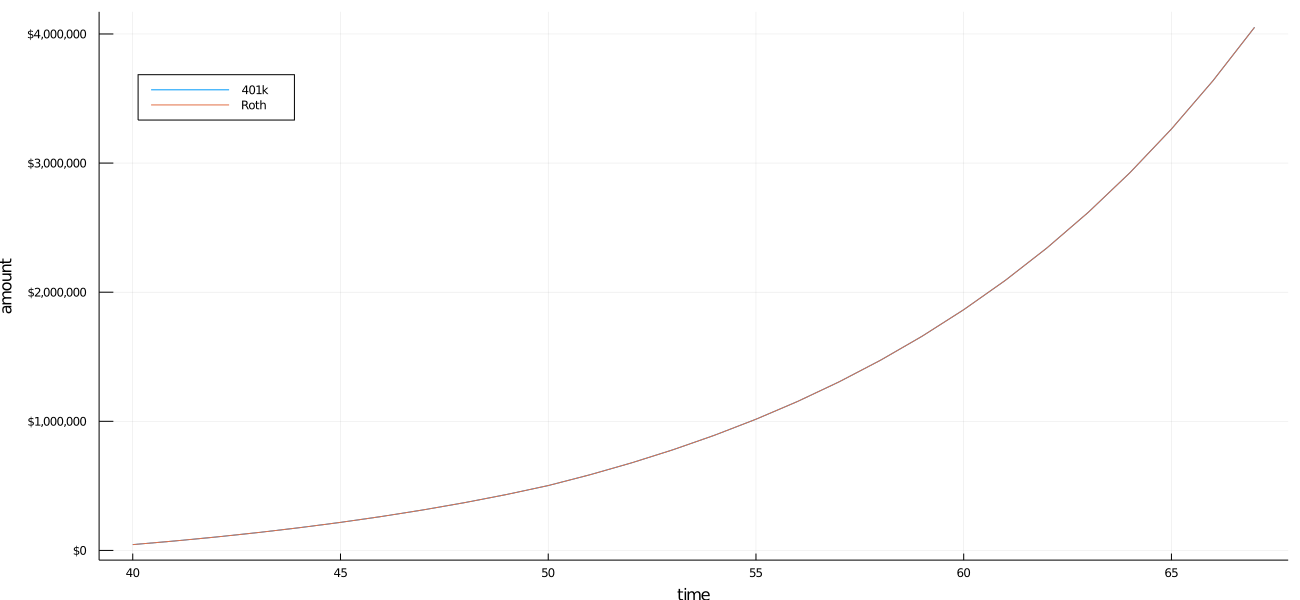

In [163]:
using Formatting
using Plots
gr()
plot(df[:,1], 
    [df[:,2]  df[:,3] ], 
    label    = ["401k" "Roth"],
    legend    =:topleft, # :right, :left, :top, :bottom, :inside, :best, :legend, :topright, :topleft, :bottomleft, :bottomright
    xlabel   = "time",
    ylabel   = "amount",
    size     = (1300, 600), # width, height
    #yformatter = :plain, # or scientific
    yformatter = yi -> string("\$", format( yi, commas=true )), # e.g. $2,000,000
    layout = (1, 1)
    )

In [160]:
savefig("401k.png") 